<a href="https://colab.research.google.com/github/ashishpatel26/Ganpat-University-Data-Science/blob/main/Lecture_9_PCA_Dimensionality_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://devopedia.org/images/article/139/4543.1548137789.jpg)

### 1.Load the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

from sklearn.decomposition import PCA

%matplotlib inline
np.random.seed(2021)

### 2.Read the data

In [2]:
#Importing the data
data= pd.read_csv("https://raw.githubusercontent.com/ashishpatel26/Ganpat-University-Data-Science/main/data/iris.csv")
data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


### 3.split data into x and y

In [3]:
 X = data.iloc[:, 0:4]
y = data.variety

### 4.Scale the data

In [4]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)

### 5.Find the covariance matrix.

In [5]:
covar_matrix = (1 / X_scaled.shape[0]) * np.matmul(X_scaled.T,X_scaled)
print(covar_matrix.shape)

(4, 4)


In [6]:
covar_matrix

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

### 6.Find the eigenvalues and eigenvectors.

In [7]:
from scipy.linalg import eigh

In [8]:
# eigh function returns the eigenvalues in ascending order
# We specify the top 2 eigenvalues (out of 0, 1, 2, 3)
values, vectors = eigh(covar_matrix, eigvals=(2, 3))
print(f"Shape of the Eigen value: {vectors.shape}")
print(f"Vectors: \n{vectors}")

Shape of the Eigen value: (4, 2)
Vectors: 
[[-0.37741762  0.52106591]
 [-0.92329566 -0.26934744]
 [-0.02449161  0.5804131 ]
 [-0.06694199  0.56485654]]


### 7.Project the original data on eigenvectors.

In [9]:
pca_components = np.matmul(X_scaled, vectors)
print(f"Principal Components: ")
pca_data = pd.DataFrame(np.hstack((pca_components, y.to_numpy().reshape(-1, 1))), columns=["Component 1", "Component 2", "Species"])
pca_data.head()

Principal Components: 


,Component 1,Component 2,Species
0,-0.480027,-2.2647,Setosa
1,0.674134,-2.08096,Setosa
2,0.341908,-2.36423,Setosa
3,0.597395,-2.29938,Setosa
4,-0.646835,-2.38984,Setosa


### 8.Let's calculate the percentage of variation explained.

In [10]:
print(f"Explained Variance : {values.sum() / eigh(covar_matrix)[0].sum() * 100} %")

Explained Variance : 95.8132072000017 %


### 9.Plot the Principal Component

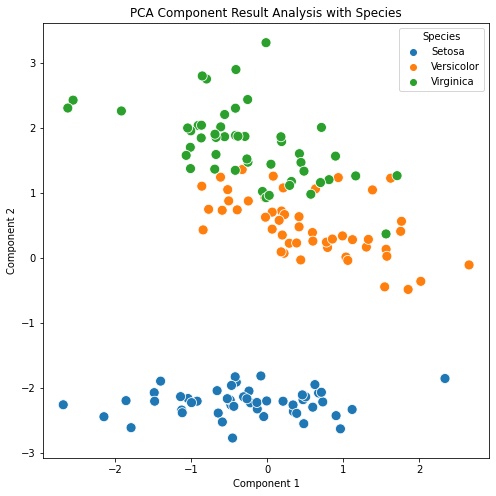

In [11]:
plt.figure(figsize=(8,8))
sns.scatterplot(x= "Component 1", y= "Component 2", hue= "Species", data= pca_data, s = 100)
plt.title("PCA Component Result Analysis with Species")
plt.show()

### 10.PCA With Scikit learn 

In [12]:
pca = PCA(n_components= 2, random_state=2021)

In [13]:
pca_components = pca.fit_transform(X_scaled)

In [14]:
pca_data = pd.DataFrame(np.hstack((pca_components, y.to_numpy().reshape(-1, 1))), columns=["Component 1", "Component 2", "Species"])
pca_data.head()

,Component 1,Component 2,Species
0,-2.2647,0.480027,Setosa
1,-2.08096,-0.674134,Setosa
2,-2.36423,-0.341908,Setosa
3,-2.29938,-0.597395,Setosa
4,-2.38984,0.646835,Setosa


In [15]:
print(f"Explained Variance : {pca.explained_variance_ratio_.sum() *100} %")

Explained Variance : 95.81320720000164 %


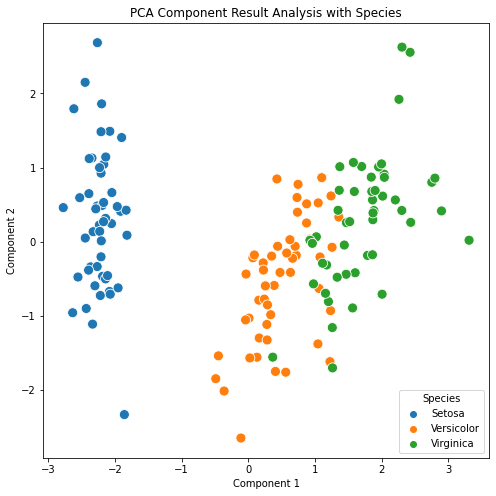

In [16]:
plt.figure(figsize=(8,8))
sns.scatterplot(x= "Component 1", y= "Component 2", hue= "Species", data= pca_data, s = 100)
plt.title("PCA Component Result Analysis with Species")
plt.show()

### Apply classfication on data

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

In [18]:
clf = RandomForestClassifier(n_estimators=10, random_state=2021)

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
pca_data["Species"] = le.fit_transform(pca_data["Species"])
pca_data.head()

,Component 1,Component 2,Species
0,-2.2647,0.480027,0
1,-2.08096,-0.674134,0
2,-2.36423,-0.341908,0
3,-2.29938,-0.597395,0
4,-2.38984,0.646835,0


In [25]:
X = pca_data.iloc[:, [0,1]]
y = pca_data.iloc[:, [2]]
clf.fit(X, y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=2021,
                       verbose=0, warm_start=False)

In [26]:
y_pred = clf.predict(X)
print(f"Accuracy : {clf.score(X,y)}")

Accuracy : 1.0


In [27]:
print("Classification Report : \n",classification_report(y, y_pred))
print("Accuracy :", accuracy_score(y, y_pred) * 100)
print("Cohen Kappa :", cohen_kappa_score(y, y_pred))

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150

Accuracy : 100.0
Cohen Kappa : 1.0


In [28]:
np.unique(pca_data.iloc[:, [2]])

array([0, 1, 2])

[[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]


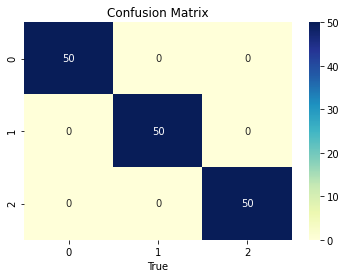

In [37]:
cm = confusion_matrix(y, y_pred)
print(cm)
sns.heatmap(cm, annot = True, cmap="YlGnBu")
plt.xlabel("Predicte")
plt.xlabel("True")
plt.title("Confusion Matrix")
plt.show()